## The database has already been created in DataStax Astra called music_streaming and generated the token

Add the required dependencies for the project

In [1]:
!pip install cassandra-driver pandas astrapy matplotlib schedule seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 33.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.1/177.1 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 35.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.6/313.6 kB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.0 MB/s eta 0:00:00


Creating requirements.txt

In [ ]:
with open("requirements.txt", "w") as f:
    f.write("pandas\n")
    f.write("numpy\n")
    f.write("astrapy\n")
    f.write("schedule\n")
    f.write("seaborn\n")
    f.write("matplotlib\n")

print("requirements.txt file created successfully!")

In [ ]:
readme_content = """# ETL Pipeline with Apache Cassandra (AstraDB)

## 📌 Project Overview
This project demonstrates a **large-scale ETL pipeline** using Apache Cassandra (AstraDB) for **data ingestion, transformation, and analytics**. The dataset consists of user activity logs from a web application.

## 🚀 Features
✅ **Extract** data from AstraDB Collections API
✅ **Transform** data by removing duplicates & aggregating user activity
✅ **Load** processed data into AstraDB for fast querying
✅ **Automated scheduling** using Google Colab
✅ **Data visualization** with Matplotlib

## 📂 Project Structure
📦 ETL-Data-Modeling-AstraDB
┣ 📂 data
┃ ┣ 📜 user_activity.csv
┣ 📜 etl_pipeline.py
┣ 📜 requirements.txt
┣ 📜 README.md


## 🛠️ Technologies Used
- **Apache Cassandra (AstraDB)**
- **Python (Pandas, NumPy, Matplotlib)**
- **Google Colab**
- **GitHub**

## 🎯 How to Run
1️⃣ Clone the repo:
   ```bash
   git clone https://github.com/your-username/ETL-Data-Modeling-AstraDB.git
   cd ETL-Data-Modeling-AstraDB

2️⃣ Install dependencies:
    pip install -r requirements.txt

3️⃣ Run the ETL script:
    python etl_pipeline.py

“””

with open(“README.md”, “w”) as f:
f.write(readme_content)

print(“README.md file created successfully!”)

Describe a method to check for UUIDs

In [ ]:
def ensureUUID(value):
  if isinstance(value, uuid.UUID):
    return value
  else:
    return uuid.UUID(value)

Connect to AstraDB

In [ ]:
from astrapy import DataAPIClient

client = DataAPIClient("Tim's-API-Client")
db = client.get_database_by_api_endpoint("Tim's-API-Endpoint")
collection = db.get_collection('user_activity')

print("The connection has been established successfully!!")

The connection has been established successfully!!


ETL Script for Automation

In [ ]:
import pandas as pd
import uuid

def runETL():
  print("🚀 Running ETL process...")

  # Extract the input data
  data = pd.read_csv('user_activity_large.csv')

  # Transform the data for AstraDB
  data['timestamp'] = pd.to_datetime(data['timestamp'])
  data['user_id'] = data['user_id'].apply(ensureUUID)
  data['session_id'] = data['session_id'].apply(ensureUUID)

  # Batch insert into AstraDB
  records = data.to_dict(orient= 'records')
  collection.insert_many(records)

  print("✅ Automated ETL process completed successfully.")

Automate ETL Every Hour

In [ ]:
import schedule, time
# Schedule ETL to run every hour
schedule.every(1).hour.do(runETL)

print("⏳ Scheduler is active... ETL will run every hour.")

# Keep the script running
while True:
    schedule.run_pending()
    time.sleep(60)  # Check every 60 seconds

⏳ Scheduler is active... ETL will run every hour.
🚀 Running ETL process...
✅ Automated ETL process completed successfully.
🚀 Running ETL process...
✅ Automated ETL process completed successfully.
🚀 Running ETL process...
✅ Automated ETL process completed successfully.
🚀 Running ETL process...
✅ Automated ETL process completed successfully.
🚀 Running ETL process...
✅ Automated ETL process completed successfully.
🚀 Running ETL process...
✅ Automated ETL process completed successfully.
🚀 Running ETL process...
✅ Automated ETL process completed successfully.
🚀 Running ETL process...
✅ Automated ETL process completed successfully.
🚀 Running ETL process...
✅ Automated ETL process completed successfully.
🚀 Running ETL process...
✅ Automated ETL process completed successfully.
🚀 Running ETL process...
✅ Automated ETL process completed successfully.
🚀 Running ETL process...
✅ Automated ETL process completed successfully.


Find User Activity by user_id and sort in descending order

In [ ]:
query = {"user_id": "3f16a7dd-da13-4471-9ec6-7e6a191b2a64"}
user_activity = collection.find(query)

sorted_user_activity = sorted(user_activity, key = lambda x: x['timestamp'], reverse= True)

for activity in sorted_user_activity:
    print(activity)

{'_id': '050a5e25-05e5-4e63-8a5e-2505e59e6368', 'user_id': UUID('3f16a7dd-da13-4471-9ec6-7e6a191b2a64'), 'session_id': UUID('b88b3135-58d8-46e9-9425-3a26166ee842'), 'song_id': 'S004', 'song_title': 'Cross-group neutral artificial intelligence', 'artist': 'Joseph Walton', 'timestamp': datetime.datetime(2025, 1, 8, 2, 17, 32), 'device_type': 'Desktop', 'location': 'Myerstown, ML', 'user_age': 34, 'subscription_type': 'Family'}
{'_id': 'abb9424a-db64-4208-b942-4adb64e20844', 'user_id': UUID('3f16a7dd-da13-4471-9ec6-7e6a191b2a64'), 'session_id': UUID('b88b3135-58d8-46e9-9425-3a26166ee842'), 'song_id': 'S004', 'song_title': 'Cross-group neutral artificial intelligence', 'artist': 'Joseph Walton', 'timestamp': datetime.datetime(2025, 1, 8, 2, 17, 32), 'device_type': 'Desktop', 'location': 'Myerstown, ML', 'user_age': 34, 'subscription_type': 'Family'}
{'_id': '550974c2-1221-47f8-8974-c2122177f8b8', 'user_id': UUID('3f16a7dd-da13-4471-9ec6-7e6a191b2a64'), 'session_id': UUID('b88b3135-58d8-46e

Find User Activity by song_id and display specific fields

In [ ]:
query = ({'song_id': 'S002'})
projection = {'user_id', 'timestamp'}
results = collection.find(query, projection= projection)


for result in results:
  print(result)

{'_id': '0f7abb16-7314-4d53-babb-1673145d5329', 'user_id': UUID('1277e497-07af-4278-a35f-c1312ab2a175'), 'timestamp': datetime.datetime(2025, 1, 3, 9, 39, 50)}
{'_id': '41f3d126-d860-4179-b3d1-26d8609179b2', 'user_id': UUID('1277e497-07af-4278-a35f-c1312ab2a175'), 'timestamp': datetime.datetime(2025, 1, 3, 9, 39, 50)}
{'_id': '7fbc44fe-1de1-4f1d-bc44-fe1de14f1d1d', 'user_id': UUID('1277e497-07af-4278-a35f-c1312ab2a175'), 'timestamp': datetime.datetime(2025, 1, 3, 9, 39, 50)}
{'_id': '7363e78c-d13e-4bf1-a3e7-8cd13e2bf172', 'user_id': UUID('1277e497-07af-4278-a35f-c1312ab2a175'), 'timestamp': datetime.datetime(2025, 1, 3, 9, 39, 50)}
{'_id': '366d6f97-587e-4da6-ad6f-97587e5da696', 'user_id': UUID('1277e497-07af-4278-a35f-c1312ab2a175'), 'timestamp': datetime.datetime(2025, 1, 3, 9, 39, 50)}
{'_id': '0b814ebc-d4a6-4674-814e-bcd4a6a674aa', 'user_id': UUID('1277e497-07af-4278-a35f-c1312ab2a175'), 'timestamp': datetime.datetime(2025, 1, 3, 9, 39, 50)}
{'_id': '687161cd-836b-4122-b161-cd836b6

Find all premium users listening on mobile

In [ ]:
query = {"subscription_type": "Premium", "device_type": "Mobile"}
premium_users = collection.find(query)

for user in premium_users:
    print(user)

{'_id': 'e8df941f-a860-4cfc-9f94-1fa8607cfcaa', 'user_id': UUID('ec06533e-22d5-4bd0-930b-622344370b19'), 'session_id': UUID('83291e3d-b90b-4cd9-baf0-bf32b414da35'), 'song_id': 'S074', 'song_title': 'Robust systemic budgetary management', 'artist': 'Brandon Barnes', 'timestamp': datetime.datetime(2025, 1, 15, 19, 37, 23), 'device_type': 'Mobile', 'location': 'Stephensonhaven, LS', 'user_age': 43, 'subscription_type': 'Premium'}
{'_id': 'd22e7c30-82e1-4f6f-ae7c-3082e15f6f02', 'user_id': UUID('166ae34b-2d21-4b9e-9374-5296d51fa84f'), 'session_id': UUID('da4b0b49-97a1-4a77-b973-9b34906d3d5a'), 'song_id': 'S084', 'song_title': 'Proactive leadingedge synergy', 'artist': 'Linda Stevens', 'timestamp': datetime.datetime(2025, 1, 25, 8, 6, 26), 'device_type': 'Mobile', 'location': 'Pricestad, VN', 'user_age': 26, 'subscription_type': 'Premium'}
{'_id': 'e9be07c5-e8f1-428b-be07-c5e8f1628b0d', 'user_id': UUID('166ae34b-2d21-4b9e-9374-5296d51fa84f'), 'session_id': UUID('da4b0b49-97a1-4a77-b973-9b349

Plot Song Plays Per Device Type

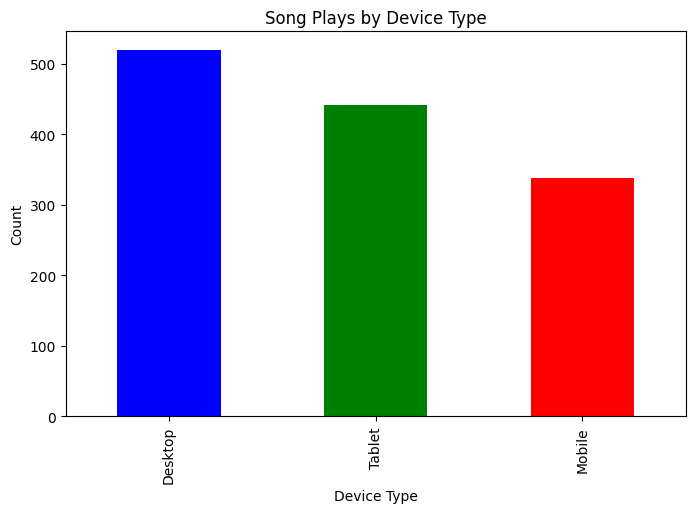

In [ ]:
import matplotlib.pyplot as plt

data = pd.DataFrame(collection.find({}))

# Count plays per device
device_counts = data["device_type"].value_counts()

# Plot
plt.figure(figsize=(8, 5))
device_counts.plot(kind="bar", color=["blue", "green", "red"])
plt.title("Song Plays by Device Type")
plt.xlabel("Device Type")
plt.ylabel("Count")
plt.show()

Plot Age Distribution of Users

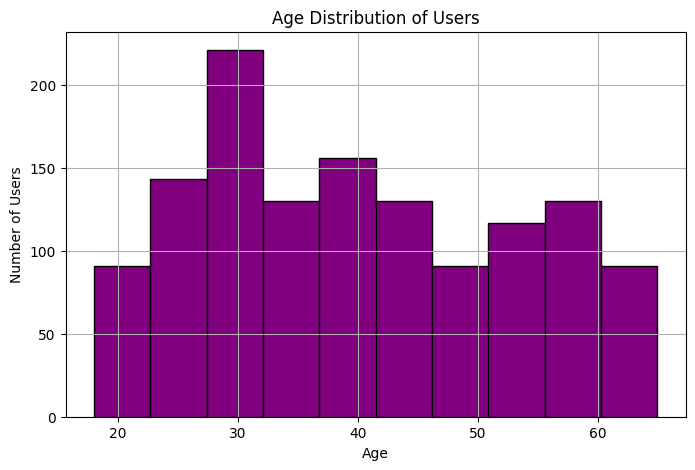

In [ ]:
plt.figure(figsize=(8, 5))
data["user_age"].hist(bins=10, color="purple", edgecolor="black")
plt.title("Age Distribution of Users")
plt.xlabel("Age")
plt.ylabel("Number of Users")
plt.show()

Check for Missing or Corrupted Data

In [ ]:
import pandas as pd

# Load data from AstraDB
data = list(collection.find({}))
df = pd.DataFrame(data)

# Check for missing values
missing_values = df.isnull().sum()
print(f"The missing values per column are:\n {missing_values}")

# Check for duplicate values
duplicates = df.duplicated(subset=['user_id','session_id']).sum()
print(f"\nDuplicate records found are: {duplicates}")

# Check the data types of the data
print("\nData types are: \n", df.dtypes)

The missing values per column are:
 _id                     0
user_id               200
session_id            200
song_id               200
song_title            200
artist                  0
timestamp               0
device_type           200
location                0
user_age              200
subscription_type     200
userID               1300
sessionID            1300
songID               1300
songTitle            1300
deviceType           1300
userAge              1300
subscriptionType     1300
dtype: int64

Duplicate records found are: 1399

Data types are: 
 _id                   object
user_id               object
session_id            object
song_id               object
song_title            object
artist                object
timestamp             object
device_type           object
location              object
user_age             float64
subscription_type     object
userID                object
sessionID             object
songID                object
songTitle             o

Handle Data Issues

In [ ]:
# Remove duplicates
df = df.drop_duplicates(subset=["user_id", "session_id"])

# Fill missing timestamps with default value
df["timestamp"].fillna("0000-00-00 00:00:00")

,timestamp
0,2025-01-03 09:39:50
1,2025-01-19 06:58:14
2,2025-01-15 08:37:57
3,2025-01-11 22:53:04
4,2025-01-18 18:21:58
...,...
323,2025-01-15 16:57:48
343,2025-01-12 22:56:29
360,2025-01-11 08:40:56
511,2025-01-13 21:16:24


Check for duplicate values after removing

In [ ]:
import pandas as pd

# Check for missing values
missing_values = df.isnull().sum()
print(f"The missing values per column are:\n {missing_values}")

# Check for duplicate values
duplicates = df.duplicated(subset=['user_id','session_id']).sum()
print(f"\nDuplicate records found are: {duplicates}")

# Check the data types of the data
print("\nData types are: \n", df.dtypes)

The missing values per column are:
 _id                    0
user_id                1
session_id             1
song_id                1
song_title             1
artist                 0
timestamp              0
device_type            1
location               0
user_age               1
subscription_type      1
userID               100
sessionID            100
songID               100
songTitle            100
deviceType           100
userAge              100
subscriptionType     100
dtype: int64

Duplicate records found are: 0

Data types are: 
 _id                   object
user_id               object
session_id            object
song_id               object
song_title            object
artist                object
timestamp             object
device_type           object
location              object
user_age             float64
subscription_type     object
userID                object
sessionID             object
songID                object
songTitle             object
deviceType     

Aggregate Data by User Activity

In [ ]:
count_user_activity = df['user_id'].value_counts().head(10)
print("The top 10 most active users are: \n")
for user in count_user_activity.index:
  print(user)

count_song_activity = df['song_title'].value_counts().head(10)
print("\nThe top 10 songs are: \n")
for song in count_song_activity.index:
  print(song)

count_popular_artist = df['artist'].value_counts().head(10)
print("\nThe most popular artists are: \n")
for artist in count_popular_artist.index:
  print(artist)

The top 10 most active users are: 

1277e497-07af-4278-a35f-c1312ab2a175
8ab18316-8dd0-47e5-a7ed-c5ab83dca678
81c08c65-1dbb-4662-981d-c80dbe33bec4
a78fc0c0-6103-42d3-bc99-4f0aab8e1787
19d9a1a3-7eff-4915-911c-20ee6d5be493
fc3f9ebc-e896-47b3-b33c-bc176860ff6e
4b510abf-2fa9-41f1-8dd1-df2011fc15f2
be57573a-4b5e-456f-a744-4ad8296d424f
ef12c033-2e36-434e-ba87-4e4ae48352eb
4ae68f29-11fa-46c7-b8a1-ffd8dc140787

The top 10 songs are: 

Seamless systematic forecast
Re-engineered 24/7 success
Persevering reciprocal matrix
Organic web-enabled info-mediaries
Triple-buffered well-modulated complexity
Fundamental dynamic conglomeration
Customer-focused composite concept
Inverse systemic policy
Down-sized needs-based productivity
Devolved high-level function

The most popular artists are: 

Ashley Sanchez
Peter Parker
Erica Tucker
Zachary Kelly
Mary Terry
Craig Vasquez
Marie Boone
Brandi Powers
Douglas Elliott
Bruce Ramos


Calculate Average Session Duration

In [ ]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['session_duration'] = df.groupby('session_id')['timestamp'].transform(lambda x: x.max()- x.min())

avg_duration = df['session_duration'].mean()
print("Average session duration: ", avg_duration)

In [ ]:
print(df.groupby('session_id')['timestamp'].agg(['min', 'max', 'count']))

                                                     min                 max  \
session_id                                                                     
052fe19b-3bc8-435a-a40c-6f367c3ac8eb 2025-01-03 09:39:50 2025-01-03 09:39:50   
09963119-616d-456e-aa21-50428ab437d0 2025-01-19 06:37:38 2025-01-19 06:37:38   
0a04229f-2743-4ec1-ab14-c107bc57c275 2025-01-20 08:12:12 2025-01-20 08:12:12   
0c539202-6ee6-4bf1-b657-dd459116129b 2025-01-26 18:58:33 2025-01-26 18:58:33   
0d1858a9-9a8f-467b-8d4f-835edde7d1c0 2025-01-07 18:49:01 2025-01-07 18:49:01   
...                                                  ...                 ...   
eff70cc2-745c-40a5-b0d4-ec4945791b3b 2025-01-07 19:58:45 2025-01-07 19:58:45   
f2a1822f-33f9-41c7-9243-e1e8817bfd0d 2025-01-20 14:21:01 2025-01-20 14:21:01   
f327c662-af1d-4e97-93c6-96cd921bd377 2025-01-13 09:38:41 2025-01-13 09:38:41   
f853d708-779f-4a89-8d8e-459f43fa9584 2025-01-11 08:40:56 2025-01-11 08:40:56   
ff70e18f-b6cb-438a-a18e-3ae1cb0a493e 202

Visualize Top Active Users

<ipython-input-34-a4a79f173895>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=count_user_activity.index, y=count_user_activity.values, palette="viridis")


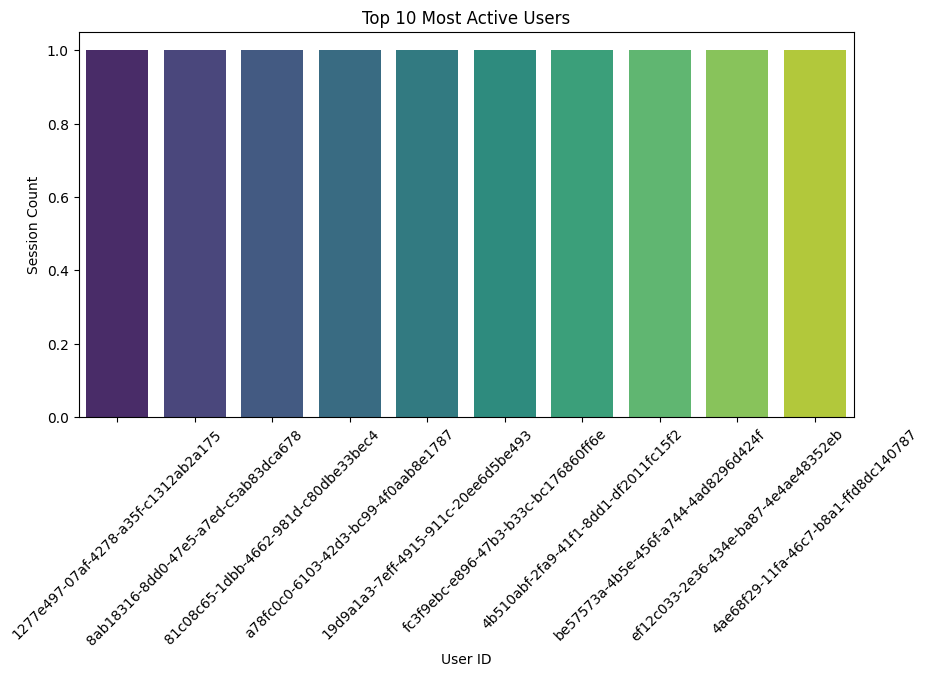

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.barplot(x=count_user_activity.index, y=count_user_activity.values, palette="viridis")
plt.xlabel("User ID")
plt.ylabel("Session Count")
plt.title("Top 10 Most Active Users")
plt.xticks(rotation=45)
plt.show()

Visualize Top Played Songs

<ipython-input-35-4b727155a699>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=count_song_activity.index, y=count_song_activity.values, palette="magma")


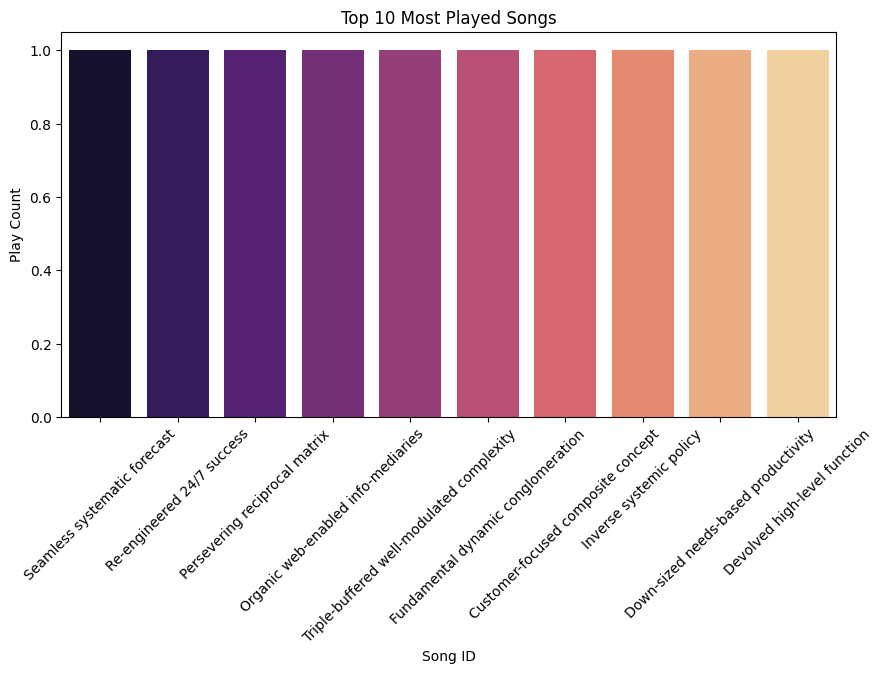

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(x=count_song_activity.index, y=count_song_activity.values, palette="magma")
plt.xlabel("Song ID")
plt.ylabel("Play Count")
plt.title("Top 10 Most Played Songs")
plt.xticks(rotation=45)
plt.show()

In [2]:
!git clone https://github.com/Timothy-Agboada/ETL-Data-Modeling-AstraDB.git

Cloning into 'ETL-Data-Modeling-AstraDB'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (3/3), done.


In [ ]:
from google.colab import files
files.upload()